In [1]:
import sklearn

In [2]:
sklearn.datasets

AttributeError: module 'sklearn' has no attribute 'datasets'

In [3]:
import sklearn.datasets as d

iris = d.load_iris()

In [4]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
len(iris.data)

150

In [8]:
# test_size가 1보다 큰 정수일경우, 개수로 따진다
# ex ) test_size = 3 : 학습용 3개

In [9]:
import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = \
ms.train_test_split(iris.data, iris.target, \
                    test_size = 0.3, random_state = 42)

In [11]:
len(X_train)

105

In [12]:
# statsmodel은 sklearn이 워낙 유용하기때문에 잘 쓰이지 않는다.
import statsmodels

In [15]:
from pandas import Series, DataFrame

In [16]:
import pandas as pd

In [20]:
df = pd.DataFrame(X_train, columns = iris.feature_names, \
                index = range(1, len(X_train) + 1))
df["label"] = y_train
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
1,5.5,2.4,3.7,1.0,1
2,6.3,2.8,5.1,1.5,2
3,6.4,3.1,5.5,1.8,2
4,6.6,3.0,4.4,1.4,1
5,7.2,3.6,6.1,2.5,2


In [21]:
# 회귀분석의 평가 지표들은 작을수록 좋고, 클수록 나쁘다.
# but, 절대적으로 어느 정도일 때 좋고, 어느 정도일 때 안좋은지 명확한 값이 없기 때문에 
# 좋은 지표가 아님. 따라서 R^2이 매우 좋은 지표로 사용된다.

In [22]:
import sklearn.linear_model as lm

lr = lm.LinearRegression()

In [23]:
X_train = [[1], [2], [3], [4], [5]]
y_train = [2.3, 3.99, 5.15, 7.89, 8.6]

reg = lr.fit(X_train, y_train)

In [24]:
X_test = [[6], [7]]
y_test = [10.1, 11.9]

y_pred = reg.predict(X_test)
print(y_pred)

[10.536 12.186]


In [25]:
import sklearn.metrics as mt

mse = mt.mean_squared_error(y_test, y_pred)
print("MSE: {:.3f}".format(mse))

MSE: 0.136


In [26]:
import numpy as np

rmse = np.sqrt(mse)
print("RMSE : {:.3f}".format(rmse))

RMSE : 0.369


In [29]:
r2 = mt.r2_score(y_test, y_pred)
print("R2 : %.3f" %r2)

R2 : 0.832


In [30]:
r2 = reg.score(X_test, y_test)
print("R2: {:.3f}".format(r2))

R2: 0.832


In [31]:
print("회귀계수: ", reg.coef_)
print("절편: ", reg.intercept_)

회귀계수:  [1.65]
절편:  0.6359999999999983


In [32]:
print("회귀식: y = {:.2f}X + {:.3f}".format(reg.coef_[0], reg.intercept_))

회귀식: y = 1.65X + 0.636


In [33]:
import statsmodels.api as sm

X_train = [[1], [2], [3], [4], [5]]
y_train = [2.3, 3.99, 5.15, 7.89, 8.6]

X_train = sm.add_constant(X_train)
print(X_train)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [34]:
lr = sm.OLS(y_train, X_train)
reg = lr.fit()

In [35]:
X_test = [[6], [7]]
y_test = [10.1, 11.9]

X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

y_pred

array([10.536, 12.186])

In [37]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     116.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):            0.00171
Time:                        11:43:16   Log-Likelihood:                -2.1891
No. Observations:                   5   AIC:                             8.378
Df Residuals:                       3   BIC:                             7.597
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6360      0.508      1.253      0.2

C:\ProgramData\ANACONDA\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [39]:
import sklearn.datasets as d

In [42]:
boston = d.load_boston()
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [44]:
boston.data.shape

(506, 13)

In [45]:
boston.target.shape

(506,)

In [46]:
import pandas as pd
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = boston.target

In [47]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [48]:
# RM을 독립으로 설정
X = pd.DataFrame(df['RM'])  # rm만 들어간 시리즈를 df로
y = df['PRICE']

In [49]:
# 분리
import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = \
ms.train_test_split(X, y, test_size = 0.3, random_state = 1)

In [50]:
import sklearn.linear_model as lm

# 준비과정, 학습과정(생략가능하지만 지금은 다 씀)
lr = lm.LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [53]:
# 평가지표 만들기
import sklearn.metrics as mt

mse = mt.mean_squared_error(y_test, y_pred)
print(mse)

mt.r2_score(y_test, y_pred)
print(r2)

print(reg.coef_)
print(reg.intercept_)

36.517214730838624
0.8321654320987635
[8.46109164]
-30.571032410898336


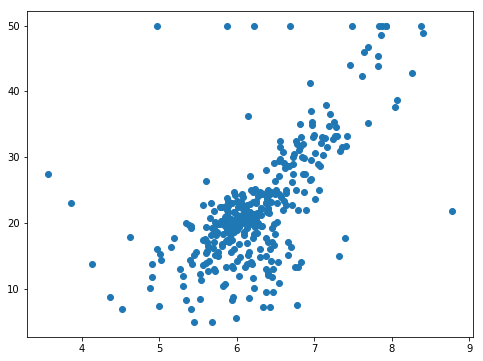

In [58]:
import matplotlib.pyplot as plt


plt.figure(figsize = (8, 6))
plt.scatter(X_train, y_train)
plt.show()